### Klasyfikator

Klasyfikacja działa podobnie. Wykorzystamy tym razem syntetyczny zestaw danych (jest to dobre rozwiązanie do testowania modeli w szybki sposób bez specyficznego zastosowania)

In [1]:
import xgboost as xgb
import numpy as np
import time
from sklearn import datasets
import matplotlib.pyplot as plt

In [5]:
np.set_printoptions(suppress=True)

In [6]:
datasets.make_classification?

Służy do tego `make_classification`

In [7]:
x, y = datasets.make_classification(
    n_samples=2500, n_features=20, n_informative=3, n_redundant=2
)

In [8]:
x

array([[-0.91500597,  2.82758243,  1.47846958, ...,  4.27399835,
         0.2923549 , -0.45607886],
       [-1.21292416,  1.39625248, -1.62454915, ..., -1.50287556,
        -1.81122752,  0.76845801],
       [ 0.84194858, -0.28599022,  0.1627789 , ...,  2.06344948,
         1.2838529 , -1.27287044],
       ...,
       [ 1.97632717,  2.21825569,  0.99267121, ...,  0.25182442,
        -1.01109924, -2.04854938],
       [-0.12628311,  2.11121033,  0.10731174, ...,  2.48361417,
         0.96915012, -1.07563185],
       [-0.110217  ,  2.02135155,  0.99995411, ...,  3.45750321,
         0.04233726, -0.08418232]])

In [9]:
from collections import Counter

Counter(y)

Counter({1: 1251, 0: 1249})

In [10]:
np.sum(y), len(y)

(1251, 2500)

Standardowy podział na dane treningowe oraz testowe

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (2000, 20)
x_test shape:  (500, 20)
y_train shape:  (2000,)
y_test shape:  (500,)


Stworzenie prostego klasyfikatora xgboost - konwencja nazewnictwa jest podobna do pozostałych modeli sklearnowych

In [12]:
xgb_cl = xgb.XGBClassifier(n_estimators=100, max_depth=3, use_label_encoder=False, eval_metric='error')

error: Binary classification error rate. It is calculated as #(wrong cases)/#(all cases). For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.

In [13]:
?xgb.XGBClassifier

Trening

In [14]:
start = time.time()

xgb_cl.fit(x_train, y_train)

end = time.time()
print("time: ",end - start)

time:  1.908601999282837


Policzenie skuteczności

In [15]:
from sklearn.metrics import accuracy_score

y_pred = xgb_cl.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print("acc: ", acc)

acc:  0.876


In [16]:
xgb_cl.score?

In [17]:
probas = xgb_cl.predict_proba(x_test)

In [18]:
positive_proba = probas[:, 1]

In [19]:
positive_proba

array([0.11691315, 0.9897843 , 0.36455572, 0.9970325 , 0.96107   ,
       0.10181504, 0.14434876, 0.01631126, 0.8821809 , 0.0722176 ,
       0.98571044, 0.06455844, 0.9988871 , 0.03716413, 0.977786  ,
       0.32914194, 0.8885221 , 0.33130533, 0.49570444, 0.07345679,
       0.9947508 , 0.24292493, 0.00636635, 0.01673821, 0.9917115 ,
       0.7879389 , 0.16503774, 0.10367153, 0.8276956 , 0.9808734 ,
       0.28849825, 0.02947657, 0.9914197 , 0.0081462 , 0.9688182 ,
       0.99008244, 0.02332091, 0.85179394, 0.0697971 , 0.48405844,
       0.0445312 , 0.6629944 , 0.26453078, 0.9276976 , 0.03376152,
       0.10238384, 0.2587709 , 0.97478014, 0.0351949 , 0.02842139,
       0.96246827, 0.9949261 , 0.9933838 , 0.84134257, 0.98102796,
       0.9564954 , 0.84062546, 0.02405863, 0.82854575, 0.07774732,
       0.0097364 , 0.9614579 , 0.97403675, 0.18131271, 0.89752656,
       0.94799954, 0.26628852, 0.01360147, 0.08955   , 0.5046464 ,
       0.02046717, 0.13957904, 0.05118493, 0.9221983 , 0.98339

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       264
           1       0.90      0.83      0.86       236

    accuracy                           0.88       500
   macro avg       0.88      0.87      0.88       500
weighted avg       0.88      0.88      0.88       500



In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, positive_proba) # AUROC Area Under Receiver Operating Charactericstic Curve

0.9349158962506421

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png)

In [22]:
from sklearn.metrics import roc_curve

roc_curve?

Text(0, 0.5, 'True positive rate')

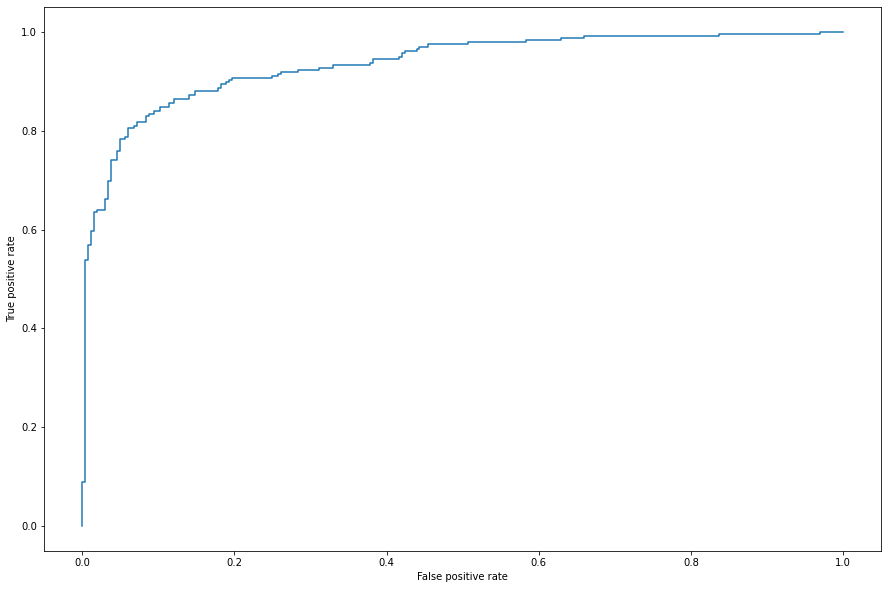

In [23]:
# Receiver operating characteristic

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, positive_proba)

plt.figure(figsize=(15, 10))
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

Text(0, 0.5, 'Precision')

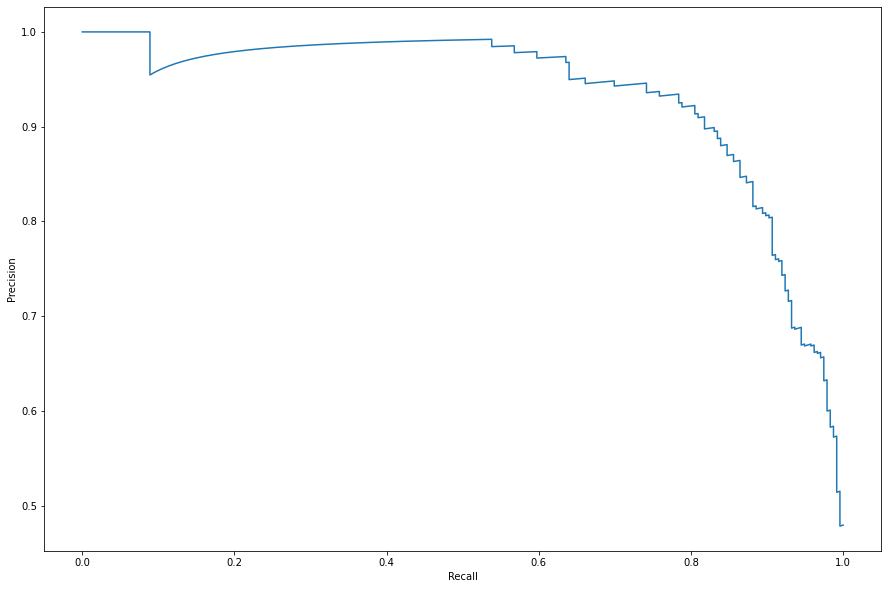

In [24]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, positive_proba)

plt.figure(figsize=(15, 10))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

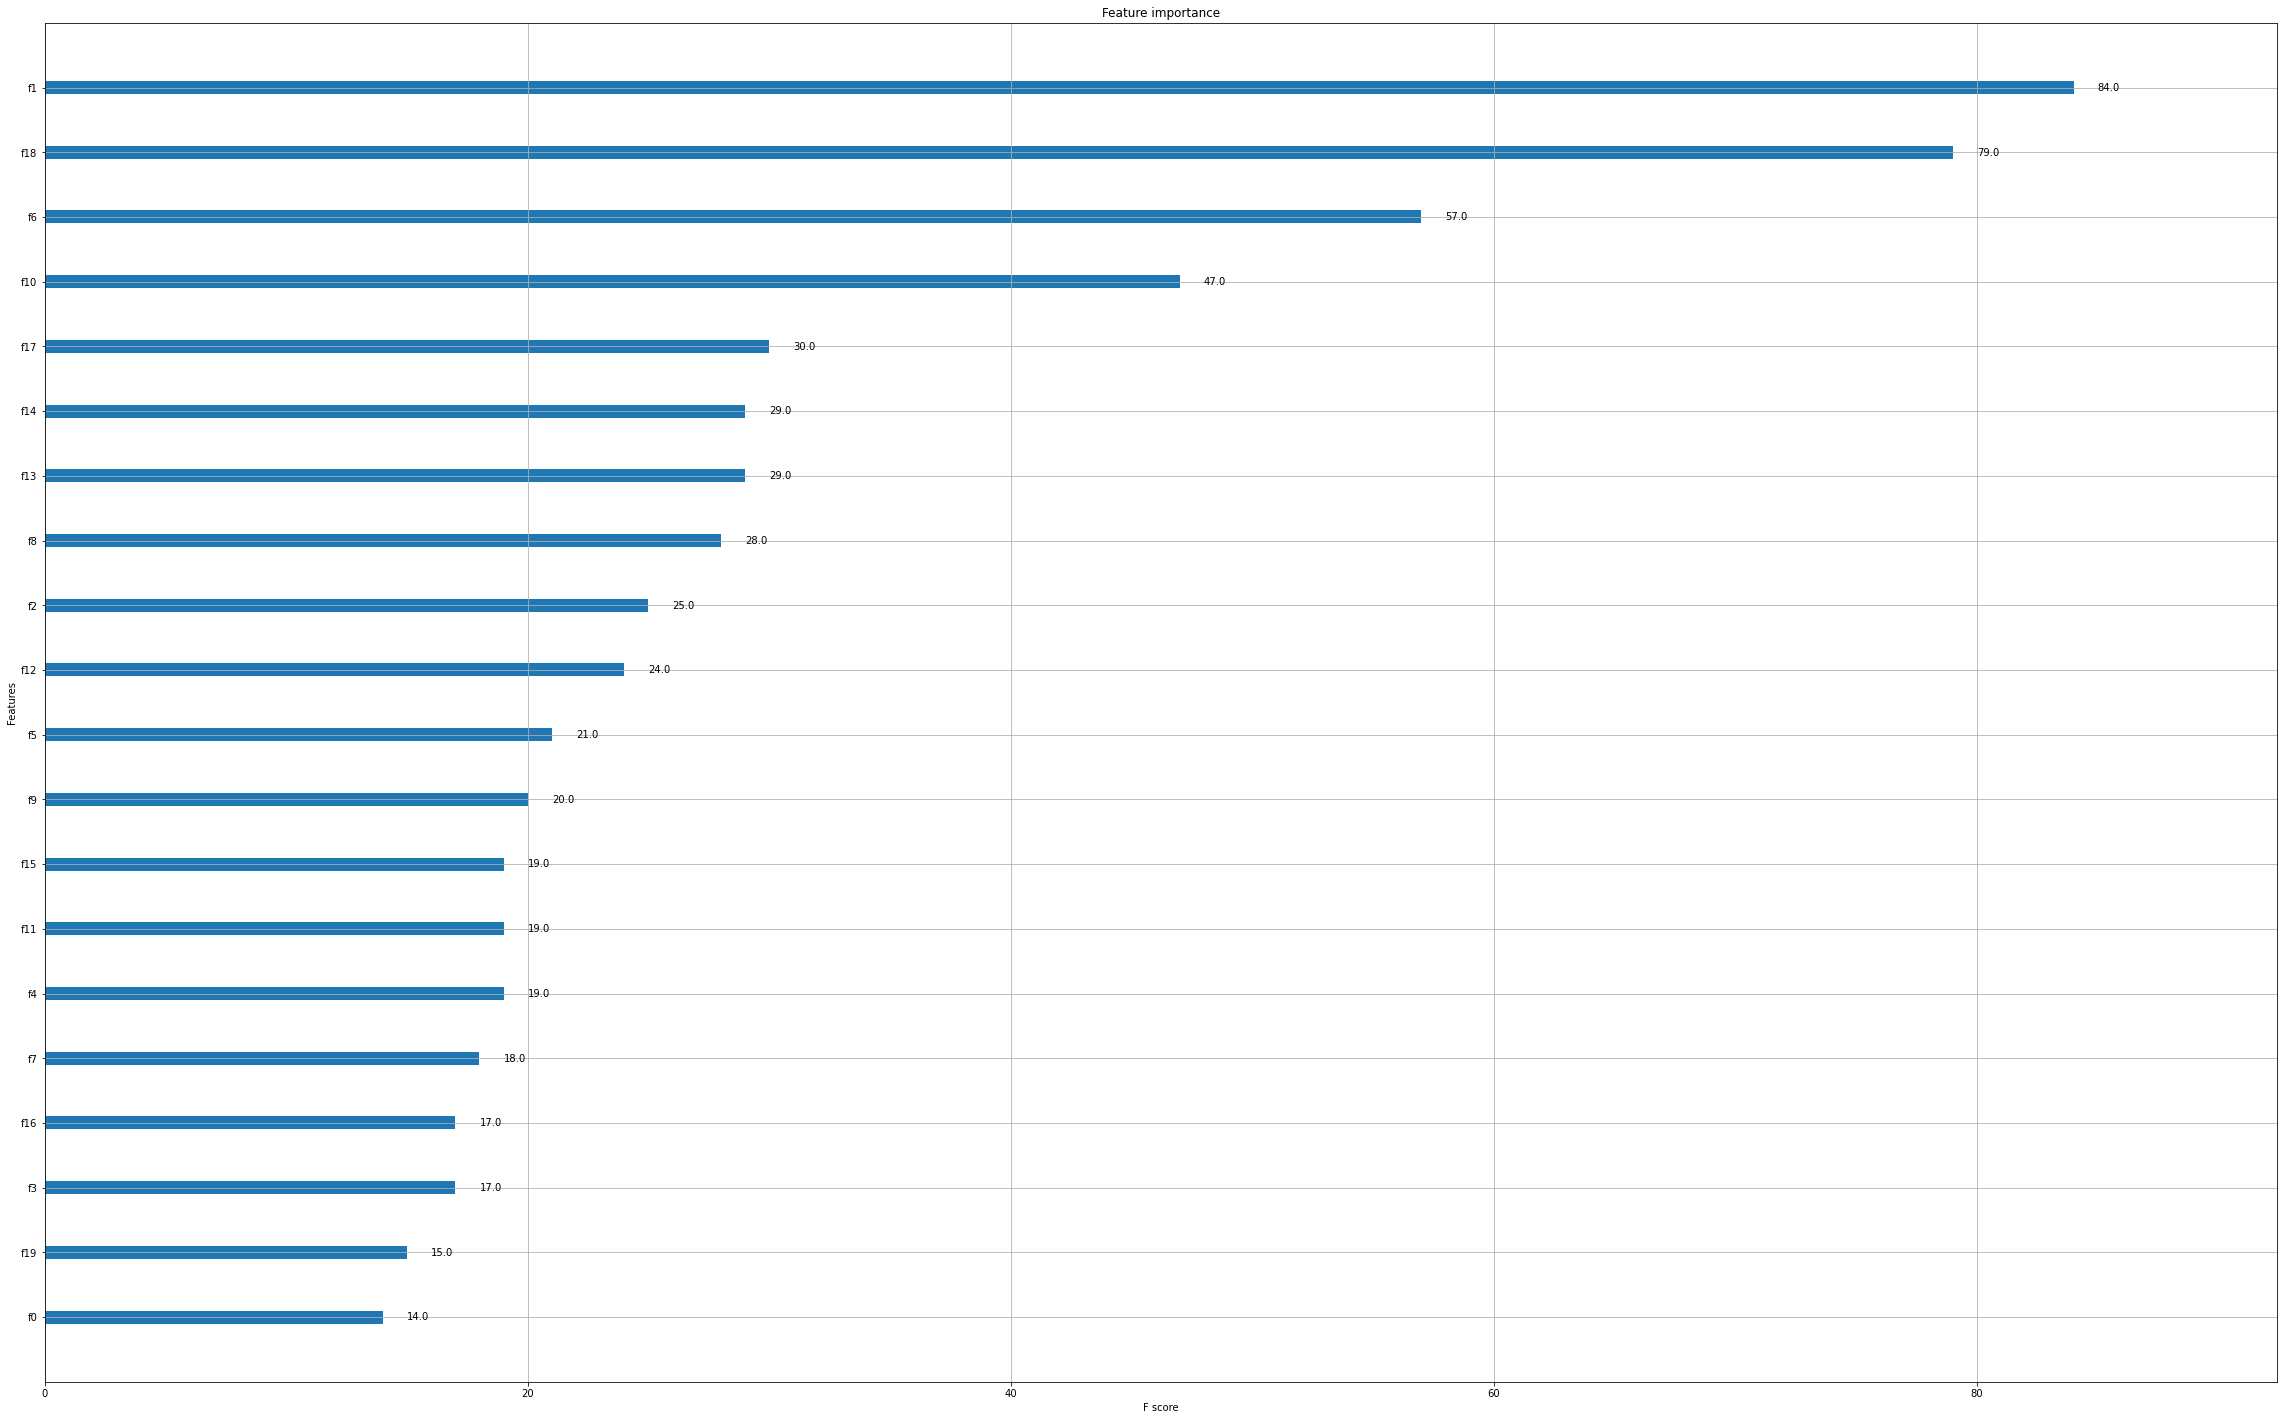

In [25]:
from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 40,25

xgb.plot_importance(xgb_cl)

### Zadanie 2

Wytrenuj klasyfikator xgboost i porównaj go z Random Forest (na tych samych parametrach).

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
xgc = xgb.XGBClassifier(n_estimators=100, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

import xgboost as xgb

rf_acc, xgb_acc, rf_auc, xgb_auc = [], [], [], []

for ix in range(10):
    print(ix)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    
    rfc = RandomForestClassifier(n_estimators=100) #nie podawany jest random seed i z tego wzgledu puszczajac model w petli mozemy otrzymac wyniki + ich odchylenie standardowe
    xgc = xgb.XGBClassifier(n_estimators=100, n_jobs=-1, use_label_encoder=False, eval_metric='logloss')
    
    rfc.fit(x_train, y_train)
    xgc.fit(x_train, y_train)
    
    rf_pred = rfc.predict(x_test)
    xg_pred = xgc.predict(x_test)
    rf_proba = rfc.predict_proba(x_test)[:, 1]
    xg_proba = xgc.predict_proba(x_test)[:, 1]
    
    rf_acc.append(accuracy_score(y_test, rf_pred))
    xgb_acc.append(accuracy_score(y_test, xg_pred))
    rf_auc.append(roc_auc_score(y_test, rf_proba))
    xgb_auc.append(roc_auc_score(y_test, xg_proba))

0
1
2
3
4
5
6
7
8
9


In [27]:
print("RF Acccuracy", round(np.array(rf_acc).mean(), 3), "+-", round(np.array(rf_acc).std(), 3))
print("XGB Acccuracy", round(np.array(xgb_acc).mean(), 3), "+-", round(np.array(xgb_acc).std(), 3))
print("RF ROC AUC", round(np.array(rf_auc).mean(), 3), "+-", round(np.array(rf_auc).std(), 3))
print("XGB ROC AUC", round(np.array(xgb_auc).mean(), 3), "+-", round(np.array(xgb_auc).std(), 3))

RF Acccuracy 0.889 +- 0.012
XGB Acccuracy 0.898 +- 0.013
RF ROC AUC 0.951 +- 0.009
XGB ROC AUC 0.957 +- 0.009
